# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

city_name = []
city_number = []
latitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []



## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

##? how did it know to get 612 cities when the commented out code is in use?

# Create a set of random lat and lng combinations
###lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
###lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
###lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
###for lat_lng in lat_lngs:
    ###city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
#below is so I do not go over the rate limits
cities = ['Kovūr','Mar del Plata','Barrow']
    # If the city is unique, then add it to a our cities list
    ###if city not in cities:
    ###    cities.append(city)


# Print the city count to confirm sufficient count
len(cities)



3

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
for city in cities:
    # Build query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    print (query_url)

    #get data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    print (weather_json)
    city_number.append(weather_json['id'])
    city_name.append(weather_json['name'])
    latitude.append(weather_json['coord']['lon'])
    temperature.append(weather_json['main']['temp'])
    humidity.append(weather_json['main']['humidity'])
    cloudiness.append(weather_json['clouds']['all'])
    wind_speed.append(weather_json['wind']['speed'])







http://api.openweathermap.org/data/2.5/weather?appid=a9cd3775da94217c65921621a995f7d6&q=Kovūr
{'coord': {'lon': 79.9833, 'lat': 14.4833}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 293.17, 'feels_like': 293.33, 'temp_min': 293.17, 'temp_max': 293.17, 'pressure': 1013, 'humidity': 73, 'sea_level': 1013, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 2.09, 'deg': 207}, 'clouds': {'all': 39}, 'dt': 1612897271, 'sys': {'country': 'IN', 'sunrise': 1612919159, 'sunset': 1612960965}, 'timezone': 19800, 'id': 1265888, 'name': 'Kovūr', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=a9cd3775da94217c65921621a995f7d6&q=Mar del Plata
{'coord': {'lon': -57.5575, 'lat': -38.0023}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 293.32, 'feels_like': 288.89, 'temp_min': 292.59, 'temp_max': 294.15, 'pres

In [8]:
print(city_name, city_number, latitude, temperature, humidity, cloudiness, wind_speed)

['Kovūr', 'Mar del Plata', 'Barrow'] [1265888, 3430863, 5880054] [79.9833, -57.5575, -156.7887] [293.17, 293.32, 238.15] [73, 64, 85] [39, 40, 1] [2.09, 7.72, 6.17]


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
city_results = pd.DataFrame({"City Name" : city_name,
                              "City Number": city_number,
                              "Latitude" : latitude,
                              "Temperature" : temperature,
                              "Humidity" : humidity,
                              "Cloudiness" : cloudiness,
                              "Wind Speed" : wind_speed})

city_results.to_csv("City Results", encoding = "utf-8", index = False)

In [20]:
city_results

,City Name,City Number,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Kovūr,1265888,79.9833,293.17,73,39,2.09
1,Mar del Plata,3430863,-57.5575,293.32,64,40,7.72
2,Barrow,5880054,-156.7887,238.15,85,1,6.17


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
#how to get the indices?  .iloc
#  Get the indices of cities that have humidity over 100%.
humid_cities = []
####update to 100%
#get a list of cities that have humidity < 100
humid_cities = city_results.loc[city_results["Humidity"] > 68, "City Name"]

print(humid_cities)


0     Kovūr
2    Barrow
Name: City Name, dtype: object


In [30]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
#?  next line - 
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = pd.merge(humid_cities, city_results, how = "left", on = ["City Name"])
#?got error merge() got unexpected argument 'inplace'
#  make a copy of ...clean_city_data = city_results
#clean_city_data = pd.merge(humid_cities, city_results, how = "left", on = ["City Name"], inplace = False)
clean_city_data

,City Name,City Number,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Kovūr,1265888,79.9833,293.17,73,39,2.09
1,Barrow,5880054,-156.7887,238.15,85,1,6.17


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

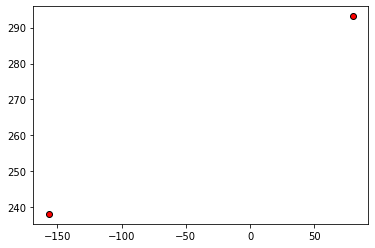

In [31]:
Latitude = clean_city_data["Latitude"]
Temperature = clean_city_data["Temperature"]

plt.scatter(Latitude, Temperature, marker="o", facecolors="red", edgecolors="black")
            #s=x_axis, alpha=0.75)
    
plt.show

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

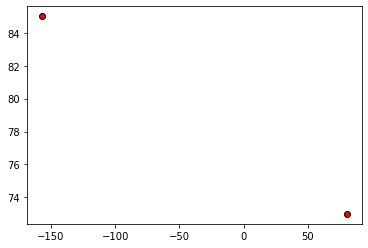

In [32]:
Latitude = clean_city_data["Latitude"]
Humidity = clean_city_data["Humidity"]
##?how do I decide which goes first - latitued or humidity 
plt.scatter(Latitude, Humidity, marker="o", facecolors="red", edgecolors="black")
            #s=x_axis, alpha=0.75)
    
plt.show

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

In [33]:
w_slope, w_intercept, w_cap_r, w_cap_p, w_cap_std_err = st.linregress(Latitude, Humidity)


NameError: name 'st' is not defined

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression